In [8]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pickle

In [9]:
CABLE_DELAYS = 0.65 * 2
FOLDER_NAME = '2019-01-28 15-45-44'

In [10]:
with open(os.path.join(FOLDER_NAME, 'data.pickle'), 'rb') as f:
    frequencies = pickle.load(f)
    sweeps = pickle.load(f)
    frame_time = pickle.load(f)

In [53]:
step = abs(frequencies[0] - frequencies[-1]) / len(frequencies)
front_padding_count = max(int(frequencies[0] / step), 0)

In [78]:
time_domain_data = []
freq_data = [tmp[0][1]['data'][x] for tmp in sweeps]
for x in range(7):
    data_pt = freq_data[:][x]
    padded_data = []

    while len(padded_data) < front_padding_count:
        padded_data.append(0)
    padded_data.append(data_pt)

    powers_of_two = [2 ** x for x in range(16)]

    for size in powers_of_two:
        if (size > len(padded_data)):
            final_size = size
            break

    while len(padded_data) < final_size:
        padded_data.append(0)
    
    time_domain_data.append(np.fft.ifft(padded_data))
time_domain_data = np.abs(time_domain_data[:len(time_domain_data) // 2])
axis = np.array(range(time_domain_data.shape[1]))

step = step * 1e6
axis = axis * (1 / (len(axis) * step * 2))

axis = axis * 1e9
axis = axis - CABLE_DELAYS

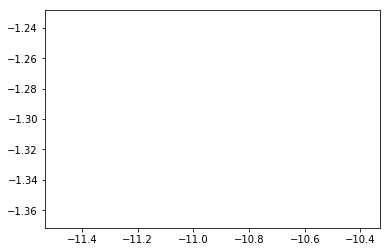

In [79]:
plt.plot(20 * np.log10(np.abs(time_domain_data[1])), axis)
plt.show()